**Lab 5: FIR Filtering 2**

The goal of this lab is to study the response of FIR filters to inputs such as complex exponentials and sinusoids. In the experiments of this lab, you will use `np.convolve()` to implement filters and `freqz()` to obtain the filter’s frequency response. As a result, you should learn how to characterize a filter by knowing how it reacts to different frequency components in the input.
This lab also introduces two practical filters: bandpass filters and nulling filters.
Bandpass filters can be used to detect and extract information from complex signals,
e.g., tones in a touch-tone telephone dialer. Nulling filters can be used to remove
sinusoidal interference, e.g., jamming signals in a radar.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram

from util import plot_frequency_response    
from IPython.display import Audio

c:\Users\mazan\OneDrive\Escritorio\Lab 4 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 4 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 4 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 4 - Group 103 - u251459\util.py:223: SyntaxWarning: invalid escape sequence '\p'
  ticktext = ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
c:\Users\mazan\OneDrive\Escritorio\Lab 4 - Group 103 - u251459\util.py:223: 

1.1. First, let's replicate what we did until now. Copy the functions synthesize and envelope and obtain the synthesis from the last lab.

In [2]:
def synthesize(f0, phi, Ak, t, A):
    y = np.zeros_like(t, dtype=float)
    for k in range(len(Ak)):
        y += Ak[k] * np.cos(2*np.pi*f0*k*t + k*phi - (k-1)*np.pi/2)
    y = A * y / (np.max(np.abs(y)) + 1e-12)
    return y

def envelope(x, N):
    N = int(max(1, N))
    w = np.abs(x).astype(float)
    b = np.ones(N, dtype=float) / N
    y = np.convolve(w, b, mode='same')
    return y


x, fs = load_audio("pluck.wav")       
t = np.arange(len(x)) / fs              

weights = [1, 0.05361973, 0.02075456, 0.00638063, 0.005605868, 0.00289555, 0.001859109, 0.001014176, 0.001188837]
Ak  = [0.0] + weights                    # Ak[1] = harmonic 1
f0  = 86.13                              # Hz
phi = 49*np.pi/72                        # phase
A   = np.max(np.abs(x))                  # match peak level

y_synth = synthesize(f0, phi, Ak, t, A)  # synthesized signal


1.2 Plot both reference and synthesised signal.

In [3]:
plot_signals([x, y_synth], fs, t_start=0, t_end=2, name=["reference", "synthesized"])


---

**2. Averaging filter**

Now let's analyze the frequency response of the average filter used in the envelope function. The Scipy Python module has a function called *freqz()* for computing the frequency
response of a discrete-time LTI system. The following Python statements show how to
use freqz to compute and plot both the magnitude (absolute value) and the phase of
the frequency response of a four-point averaging system as a function of ω in the range − π ≤ ω ≤ π :

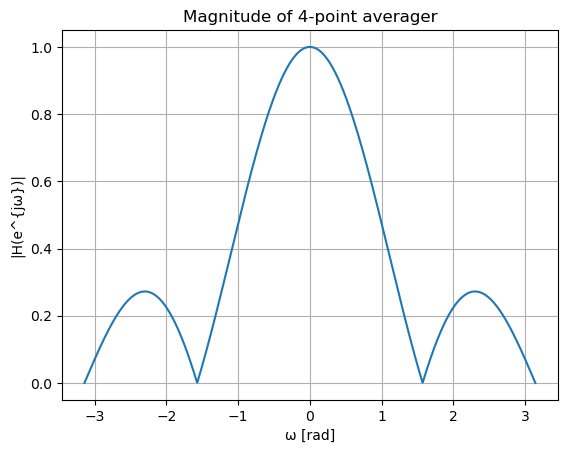

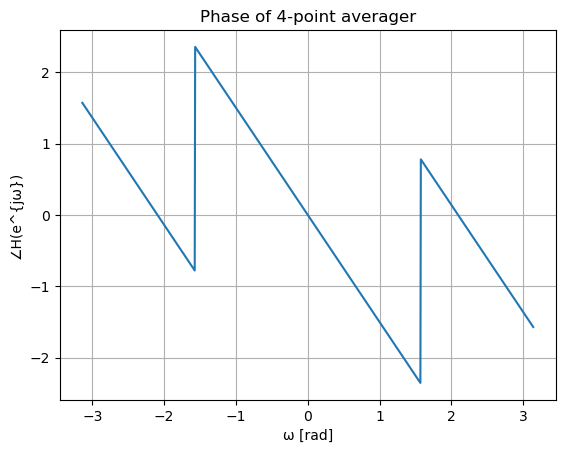

In [4]:
# 4-point averaging filter (from theory): b_k = 1/N, k = 0..N-1
N = 4
b = np.ones(N) / N    # numerator coefficients
a = 1                 # FIR → denominator is 1

# Frequency vector ww: from -pi to pi (length 2π, many points → smooth curve)
ww = np.linspace(-np.pi, np.pi, 1024)

# Frequency response H(e^{jω}) using freqz(b, 1, ww)
w, H = signal.freqz(b, a, worN=ww)

# Magnitude |H(e^{jω})|
plt.figure()
plt.plot(w, np.abs(H))
plt.xlabel('ω [rad]')
plt.ylabel('|H(e^{jω})|')
plt.title('Magnitude of 4-point averager')
plt.grid(True)

# Phase ∠H(e^{jω})
plt.figure()
plt.plot(w, np.angle(H))
plt.xlabel('ω [rad]')
plt.ylabel('∠H(e^{jω})')
plt.title('Phase of 4-point averager')
plt.grid(True)


For FIR filters, the second argument of `freqz(-, 1,- )` must always be equal to 1. The frequency vector ww should cover an interval of length 2π for ω , and its spacing must be fine enough to give a smooth curve for H(ejω) . Note: we will always use capital H for the frequency response.

2.1 Use the `freqz` and `plot_frequency_response` functions to plot the frequency response of the averaging filter of your envelope function.



In [5]:
# We build the averaging filter (same N used in the envelope)
b = np.ones(N) / N      # numerator: N coefficients equal to 1/N
a = 1                   # denominator: FIR filter → just 1

# We compute the frequency response H(e^jw)
w, H = signal.freqz(b, a)

# We plot the magnitude and phase
plot_frequency_response(w, H)


2.2 Looking at the frequency responses, what are the main differences between your filter and the four-point averaging filter. What happens when the value N is increased?

When we compare our N-point averaging filter with the 4-point one, we see that our filter passes only a smaller band of low frequencies and attenuates high frequencies more strongly. In the plot this appears as a narrower main lobe and deeper valleys in the magnitude. When we increase N, the filter becomes more low-pass: the first zero moves to lower frequency, the transition becomes narrower, the signal in time is smoother and the phase slope is larger (meaning more delay).

---

**3. Nulling Filters for Rejection**

Nulling filters are filters that completely eliminate some frequency components. If the frequency is $\omega=0$ or $\omega=\pi$ then a two-point FIR filter will do the nulling. The simplest possible general nulling filter can have as few as three coefficients. If $\omega_n$ is the desired nulling frequency, then the following length-3 FIR filter

$$
y[n] = x[n] - 2\cos(\omega_n)x[n-1] + x[n-2] 
$$

will have a zero in its frequency response at $\omega=\omega_n$. For example, a filter designed to completely eliminate signals of the form $e^{j0.5\pi}$ would have the following coefficients because we would pick the desired nulling frequency to be $\omega_n = 0.5\pi$

$$
b_0 = 1, \quad b1=-2cos(\omega_n)=0, \quad b_2=1
$$

3.1 Use the following function to add an interference in your reference signal. Name the corrupted signal as `x_interf`.

In [6]:
def add_interference(x, fs):
  x = np.asarray(x, float)        # make sure x is a float numpy array
  N = len(x)                      # number of samples
  n = np.arange(N)                # sample indices 0,1,2,etc.

  f_int = fs / 4.0                # interference frequency in Hz
  w_int = 2 * np.pi * f_int / fs  # same as ω = 0.5π rad/sample

  tone = 0.3 * np.cos(w_int * n)  # interference tone (small amplitude 0.3)

  x_interf = x + tone             # original signal + interference
  return x_interf


In [7]:
x, fs = load_audio("pluck.wav")
x_interf = add_interference(x, fs)

3.2 Plot both the reference signal and the corrupted signal and listen to the latter one. 

In [8]:
# We plot the first 2 seconds of both signals
plot_signals([x, x_interf], fs, t_start=0, t_end=2, name=['reference', 'corrupted'])

# We listen to the corrupted signal
Audio(x_interf, rate=fs)


3.3 Compare the spectrograms of the reference signal and the interference signal. 

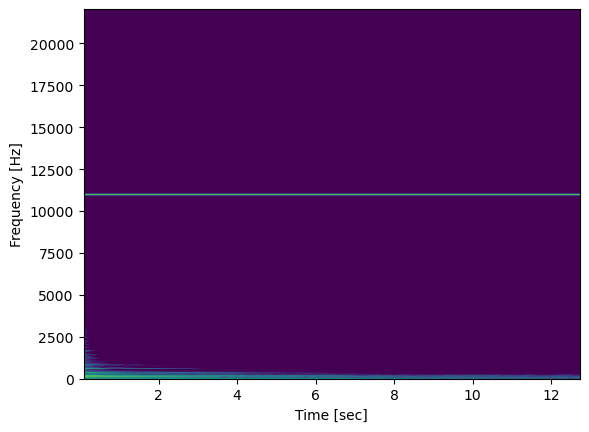

In [9]:
# Window for the spectrogram (same for both signals)
win_len = 8192

# Spectrogram of the reference signal
ff, tt, S_ref = signal.spectrogram(x, fs, nperseg=win_len, noverlap=win_len // 2)
plot_spectrogram(ff, tt, S_ref)      # reference

# Spectrogram of the corrupted / interference signal
ff, tt, S_int = signal.spectrogram(x_interf, fs, nperseg=win_len, noverlap=win_len // 2)
plot_spectrogram(ff, tt, S_int)      # corrupted (with tone)


3.4. Create a function `remove_interference(x, fs)` that applies a nulling filter devised to remove the interference at 1000 Hz. 

Note: remember that a frequency can be converted to the normalized radian frequncy by: $\omega_n = 2\pi f_n/f_s$

In [10]:
def remove_interference(x, fs):
    """
    Applies a nulling filter to remove an interference at 1000 Hz
    """

    f_n = 1000                     # interference frequency to remove (Hz)
    w_n = 2 * np.pi * f_n / fs     # normalized radian frequency

    # FIR nulling filter coefficients 
    b0 = 1
    b1 = -2 * np.cos(w_n)
    b2 = 1

    # We build the filter
    b = np.array([b0, b1, b2])     # numerator
    a = np.array([1])              # denominator (FIR → just 1)

    # We apply the filter
    y = signal.lfilter(b, a, x)

    return y


3.5 Use the `remove_interference` funcion to clean the corrupted signal,  `x_interf`. Call the output as `x_clean`. Compare the spectrograms of both signals. Explain the result.

In [11]:
# We apply our nulling filter at 1000 Hz
x_clean = remove_interference(x_interf, fs)

# We compute the spectrograms with the same settings as before
win_len = 2048                      # window length
ff, tt, S_corr  = signal.spectrogram(x_interf, fs, nperseg=win_len, noverlap=win_len//2)
ff, tt, S_clean = signal.spectrogram(x_clean,  fs, nperseg=win_len, noverlap=win_len//2)

# We plot both spectrograms
plot_mean_spectrogram([S_corr, S_clean], fs, win_len)   # the first with tone, the second without it
